In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics   import accuracy_score, classification_report, confusion_matrix
import pickle

In [3]:
# loading the csv file

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [4]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df = df.drop(columns=["customerID"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
# printing the unique values in all the columns

numerical_features_list = ['tenure', 'MonthlyCharges', "TotalCharges"]

for col in df.columns:
    if col not in numerical_features_list:
        print(col, df[col].unique())
        print("-"*50)


gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [16]:
print(df.isnull().sum())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [17]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

ValueError: could not convert string to float: ' '

In [20]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [21]:
len(df[df["TotalCharges"]==" "])

11

In [22]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [23]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [26]:
# checking the distribution of target column
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [31]:
def plot_histogram(df, column_name):
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')
    # calculate the mean mode and median
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    #add vertical lines for mean and median
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="green", linestyle="--", label="Median")

    plt.legend()

    plt.show()


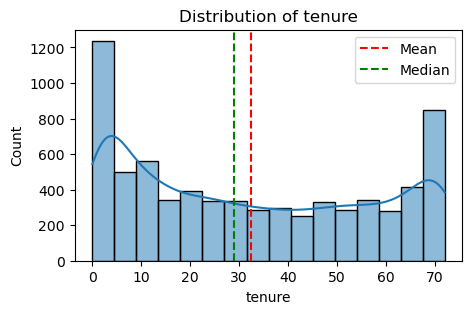

In [32]:
plot_histogram(df, "tenure")

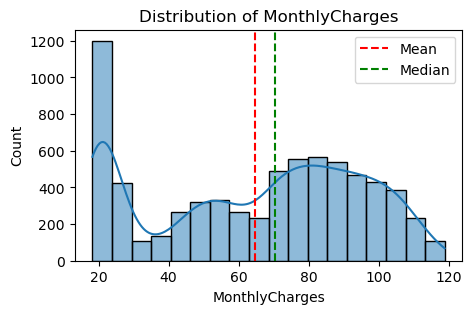

In [35]:
plot_histogram(df, "MonthlyCharges")

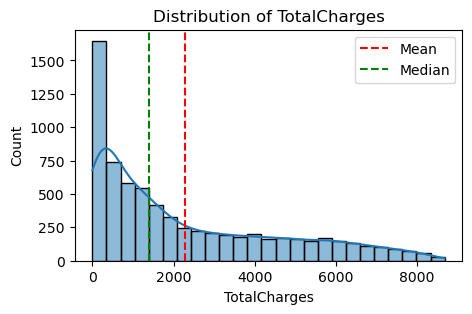

In [36]:
plot_histogram(df, "TotalCharges")



In [37]:
def plot_boxplot(df, column_name):

    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Box Plot of {column_name}")
    plt.ylabel(column_name)
    plt.show()

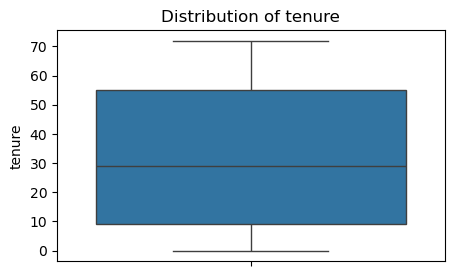

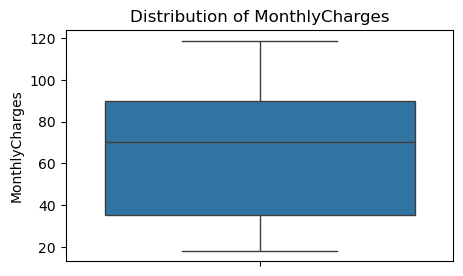

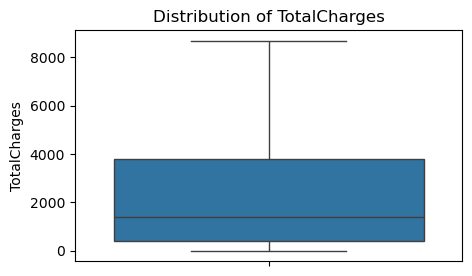

In [39]:
plot_boxplot(df, "tenure")
plot_boxplot(df, "MonthlyCharges")
plot_boxplot(df, "TotalCharges")

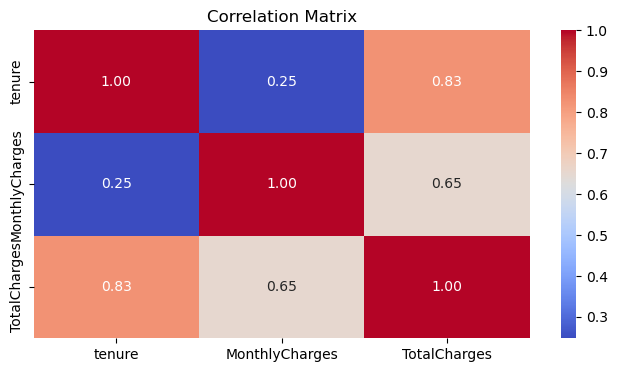

In [40]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

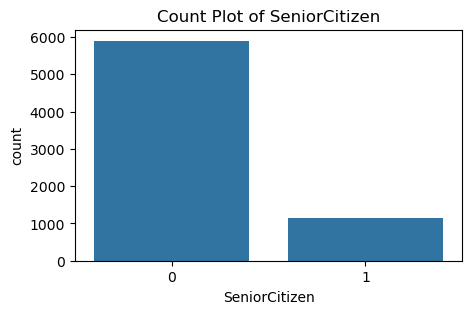

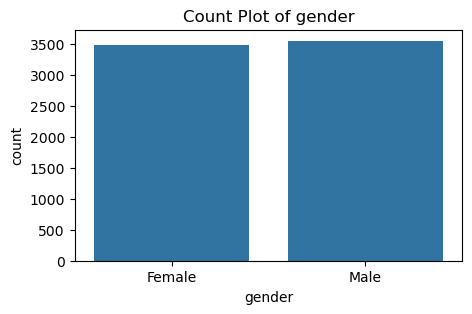

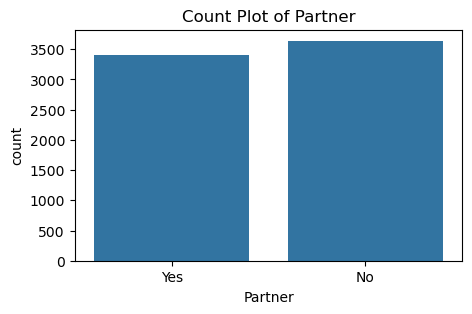

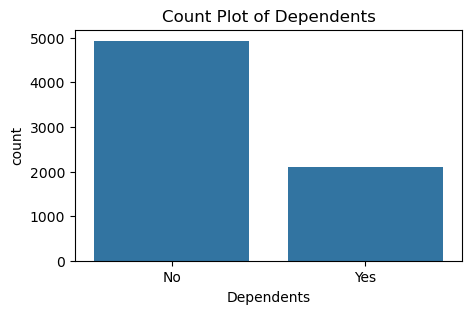

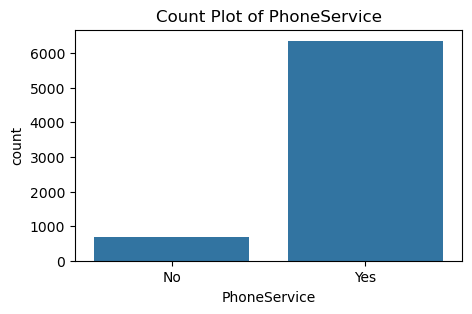

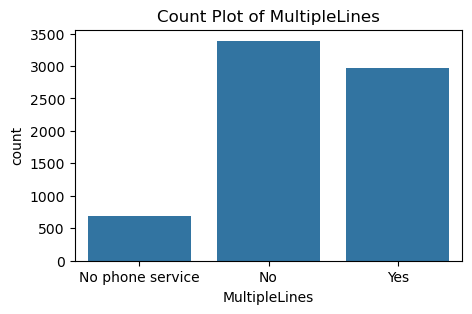

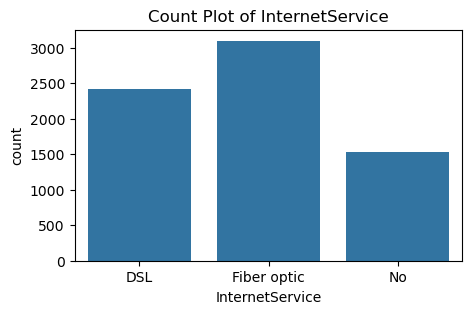

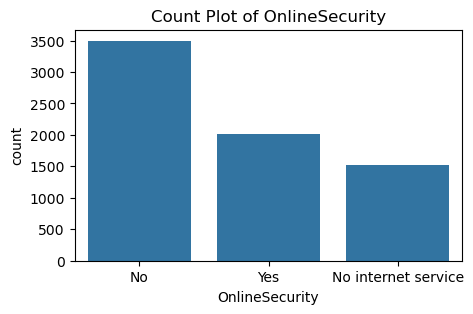

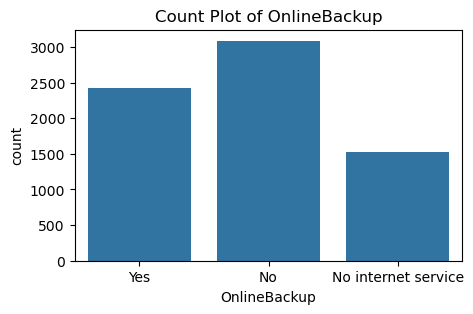

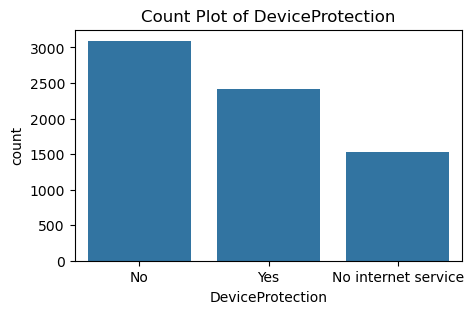

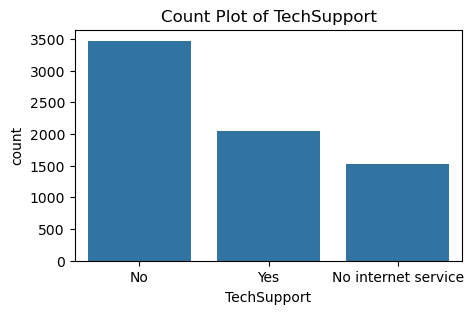

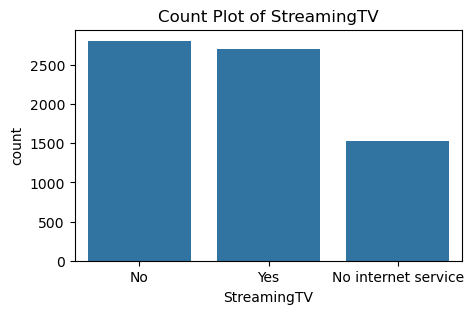

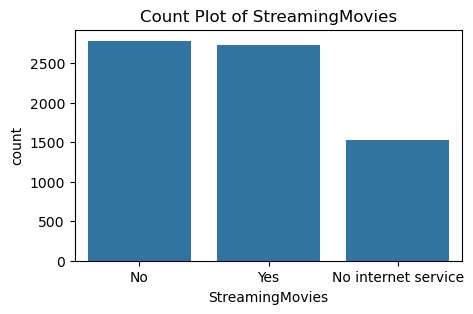

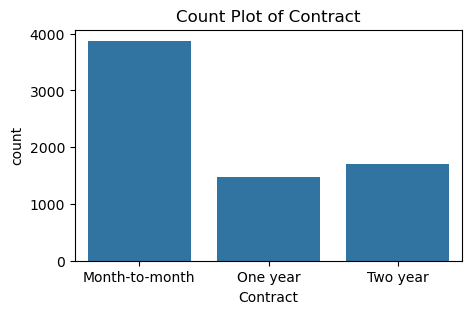

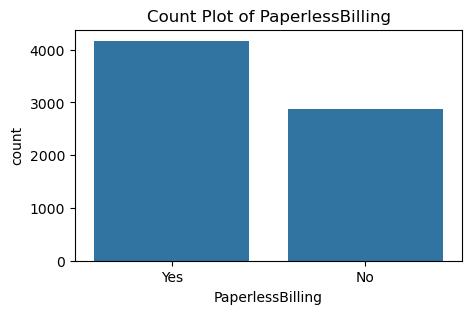

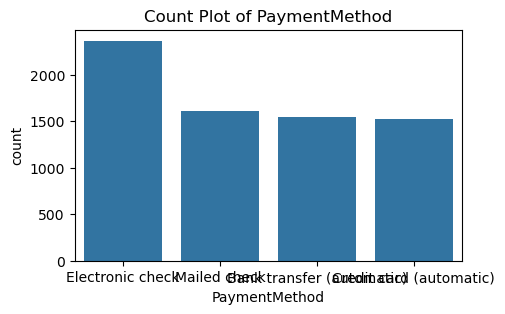

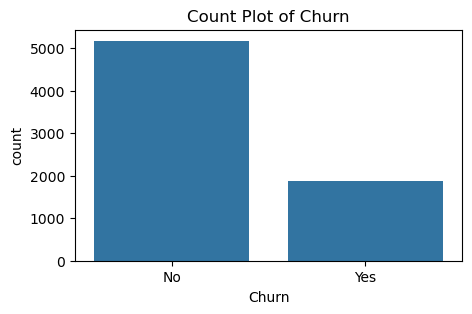

In [44]:
object_cols = df.select_dtypes(include=['object']).columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.show()

In [45]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [46]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

C:\Users\HP\AppData\Local\Temp\ipykernel_12976\2364848822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [47]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [48]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [50]:
# identifying columns with object datatype
object_columns = df.select_dtypes(include='object').columns

In [51]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [56]:
# initialize a dictionary to save the encoders
encoders = {}
#apply label encoding and store the encoders

for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder


# save the encoders
with open('encoders.pkl', 'wb') as f:    
    pickle.dump(encoders, f)

In [57]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [60]:
# training and test data split

# splottimg the features and target

x = df.drop(columns=['Churn'])
y = df['Churn'] 


In [61]:
# split training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
print(y_train.shape)

(5634,)


In [64]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [65]:
# synthtic minority oversampling rechnique

smote = SMOTE(random_state=42)

In [66]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [67]:
print(y_train_smote.shape)

(8276,)


In [69]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [70]:
# Model Training


In [72]:
# Training with default hyperparameters
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [77]:
# dictionary to store the cross validation scores
cv_scores = {}

# prform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training model: {model_name} with default parameters")
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("-"*70)

Training model: Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training model: Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training model: XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
----------------------------------------------------------------------


In [78]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71601208, 0.81993958, 0.83564955, 0.83746224]),
 'Random Forest': array([0.72826087, 0.7734139 , 0.90332326, 0.89969789, 0.8978852 ]),
 'XGBoost': array([0.71135266, 0.74864048, 0.91178248, 0.88640483, 0.91117825])}

In [79]:
rfc = RandomForestClassifier(random_state=42)

In [83]:
rfc.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [84]:
# evaluate on test data

y_test_pred = rfc.predict(x_test)

print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion matrix score:\n", confusion_matrix(y_test, y_test_pred))
print("Classification report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.7771469127040455
Confusion matrix score:
 [[879 157]
 [157 216]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [87]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": x.columns.tolist()} 

with open('customer_churn_model.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [95]:
# Load the saved model and build a predictive system

# load the saved model and the encoders

with open("customer_churn_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("encoders.pkl", "rb") as f:
    loaded_encoders = pickle.load(f)

# use the feature names from the original x dataframe
features_names = x.columns.tolist()

In [96]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [97]:
print(features_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [116]:
# Sample customer data as dictionary
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

 
input_data_df = pd.DataFrame([input_data])

print(input_data_df.head())    

# encode categorical features using the saved encoders
for column, encoder in loaded_encoders.items():
    if column in input_data_df.columns:
        try:
            input_data_df[column] = encoder.transform(input_data_df[column])
        except ValueError as e:
            print(f"Error encoding {column}: {e}")
            print(f"Valid values for {column}: {list(encoder.classes_)}")
            # Handle unknown categories by using the most frequent class or a default
            input_data_df[column] = encoder.transform([encoder.classes_[0]])[0]

# make prediction
prediction = loaded_model.predict(input_data_df)
prediction_proba = loaded_model.predict_proba(input_data_df)

print(f"Prediction: {'Will Churn' if prediction[0] == 1 else 'Will Not Churn'}")
print(f"Churn Probability: {prediction_proba[0][1]:.2f}")
print(f"No Churn Probability: {prediction_proba[0][0]:.2f}")

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  
Error encoding gender: invalid literal for int() with base 10: 'Female'
Valid values for gender: [0, 1]
Error encoding Partner: invalid literal for int() with base 10: 'Yes'
Valid values for Partner: [0, 1]
Error encoding Dependents: invalid literal for int() with base 10: 'No'
Valid values for Dependents: [0, 1]
Error encoding PhoneService: invalid literal for int() with base 10: 'No'
Valid values for PhoneService: [0, 1]
Error 

In [117]:
input_data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85


In [118]:
# Check what the encoders actually expect
print("Encoder classes for each feature:")
for column, encoder in loaded_encoders.items():
    print(f"{column}: {list(encoder.classes_)}")
    print("-" * 50)

Encoder classes for each feature:
gender: [0, 1]
--------------------------------------------------
Partner: [0, 1]
--------------------------------------------------
Dependents: [0, 1]
--------------------------------------------------
PhoneService: [0, 1]
--------------------------------------------------
MultipleLines: [0, 1, 2]
--------------------------------------------------
InternetService: [0, 1, 2]
--------------------------------------------------
OnlineSecurity: [0, 1, 2]
--------------------------------------------------
OnlineBackup: [0, 1, 2]
--------------------------------------------------
DeviceProtection: [0, 1, 2]
--------------------------------------------------
TechSupport: [0, 1, 2]
--------------------------------------------------
StreamingTV: [0, 1, 2]
--------------------------------------------------
StreamingMovies: [0, 1, 2]
--------------------------------------------------
Contract: [0, 1, 2]
--------------------------------------------------
Paperless

In [ ]:
# Create a proper prediction function
def predict_churn_with_original_data(customer_data, model, encoders, feature_names):
    """
    Predict customer churn using original categorical values
    """
    # Create DataFrame from input data
    input_df = pd.DataFrame([customer_data])
    
    # Apply label encoding for categorical columns
    for column in input_df.select_dtypes(include=['object']).columns:
        if column in encoders:
            try:
                # Transform the categorical values to encoded values
                input_df[column] = encoders[column].transform(input_df[column])
            except ValueError as e:
                print(f"Warning: Unknown category in {column}: {input_df[column].iloc[0]}")
                print(f"Valid categories: {list(encoders[column].classes_)}")
                # Use the first class as default for unknown categories
                input_df[column] = 0
    
    # Ensure column order matches training data
    input_df = input_df.reindex(columns=feature_names)
    
    # Make prediction
    prediction = model.predict(input_df)[0]
    prediction_proba = model.predict_proba(input_df)[0]
    
    # Format results
    churn_status = "Will Churn" if prediction == 1 else "Will Not Churn"
    churn_probability = prediction_proba[1] * 100
    no_churn_probability = prediction_proba[0] * 100
    
    return {
        'prediction': churn_status,
        'churn_probability': f"{churn_probability:.2f}%",
        'no_churn_probability': f"{no_churn_probability:.2f}%",
        'confidence': f"{max(prediction_proba) * 100:.2f}%"
    }

# Test with the customer data
customer_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

# Make prediction
result = predict_churn_with_original_data(customer_data, loaded_model, loaded_encoders, features_names)

print("=== Customer Churn Prediction ===")
print(f"Customer ID: 7590-VHVEG")
print(f"Prediction: {result['prediction']}")
print(f"Confidence: {result['confidence']}")
print(f"Churn Probability: {result['churn_probability']}")
print(f"No Churn Probability: {result['no_churn_probability']}")

In [119]:
# Let's reload the original data to see the actual categories
df_original = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_original = df_original.drop(columns=["customerID"])

print("Original categorical values in the dataset:")
print("=" * 60)

categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                   'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    if col in df_original.columns:
        print(f"{col}: {sorted(df_original[col].unique())}")
        print("-" * 50)

Original categorical values in the dataset:
gender: ['Female', 'Male']
--------------------------------------------------
Partner: ['No', 'Yes']
--------------------------------------------------
Dependents: ['No', 'Yes']
--------------------------------------------------
PhoneService: ['No', 'Yes']
--------------------------------------------------
MultipleLines: ['No', 'No phone service', 'Yes']
--------------------------------------------------
InternetService: ['DSL', 'Fiber optic', 'No']
--------------------------------------------------
OnlineSecurity: ['No', 'No internet service', 'Yes']
--------------------------------------------------
OnlineBackup: ['No', 'No internet service', 'Yes']
--------------------------------------------------
DeviceProtection: ['No', 'No internet service', 'Yes']
--------------------------------------------------
TechSupport: ['No', 'No internet service', 'Yes']
--------------------------------------------------
StreamingTV: ['No', 'No internet servi

In [120]:
# Create fresh encoders with the original data to get proper mapping
fresh_encoders = {}
df_temp = df_original.copy()

# Convert Churn to numeric
df_temp["Churn"] = df_temp["Churn"].replace({"Yes": 1, "No": 0})

# Get object columns (excluding Churn which is now numeric)
object_columns_fresh = df_temp.select_dtypes(include='object').columns

print("Creating fresh encoders...")
for column in object_columns_fresh:
    label_encoder = LabelEncoder()
    df_temp[column] = label_encoder.fit_transform(df_temp[column])
    fresh_encoders[column] = label_encoder
    print(f"{column}: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

print("\nFresh encoders created successfully!")

C:\Users\HP\AppData\Local\Temp\ipykernel_12976\3859742353.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temp["Churn"] = df_temp["Churn"].replace({"Yes": 1, "No": 0})


Creating fresh encoders...
gender: {'Female': 0, 'Male': 1}
Partner: {'No': 0, 'Yes': 1}
Dependents: {'No': 0, 'Yes': 1}
PhoneService: {'No': 0, 'Yes': 1}
MultipleLines: {'No': 0, 'No phone service': 1, 'Yes': 2}
InternetService: {'DSL': 0, 'Fiber optic': 1, 'No': 2}
OnlineSecurity: {'No': 0, 'No internet service': 1, 'Yes': 2}
OnlineBackup: {'No': 0, 'No internet service': 1, 'Yes': 2}
DeviceProtection: {'No': 0, 'No internet service': 1, 'Yes': 2}
TechSupport: {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingTV: {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingMovies: {'No': 0, 'No internet service': 1, 'Yes': 2}
Contract: {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
PaperlessBilling: {'No': 0, 'Yes': 1}
PaymentMethod: {'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}
TotalCharges: {' ': 0, '100.2': 1, '100.25': 2, '100.35': 3, '100.4': 4, '100.8': 5, '100.9': 6, '1001.2': 7, '1001.5': 8, '1003.05': 9, '1004.35

In [122]:
# Final working prediction function
def predict_customer_churn_fixed(customer_data, model, encoders, feature_names):
    """
    Predict customer churn using original categorical values with proper encoding
    """
    # Create DataFrame from input data
    input_df = pd.DataFrame([customer_data])
    
    print("Input data before encoding:")
    print(input_df)
    print("\n" + "="*50)
    
    # Apply label encoding for categorical columns using fresh encoders
    for column in input_df.select_dtypes(include=['object']).columns:
        if column in encoders:
            try:
                input_df[column] = encoders[column].transform(input_df[column])
                print(f"Encoded {column}: {customer_data[column]} -> {input_df[column].iloc[0]}")
            except ValueError as e:
                print(f"Error: Unknown category '{customer_data[column]}' in {column}")
                print(f"Valid categories: {list(encoders[column].classes_)}")
                return None
    
    print("\nInput data after encoding:")
    print(input_df)
    
    # Ensure column order matches training data
    input_df = input_df.reindex(columns=feature_names)
    
    # Make prediction
    prediction = model.predict(input_df)[0]
    prediction_proba = model.predict_proba(input_df)[0]
    
    return {
        'prediction': "Will Churn" if prediction == 1 else "Will Not Churn",
        'churn_probability': f"{prediction_proba[1]*100:.2f}%",
        'no_churn_probability': f"{prediction_proba[0]*100:.2f}%",
        'confidence': f"{max(prediction_proba)*100:.2f}%"
    }

# Define customer data
customer_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

# Test the fixed prediction
print("=== TESTING FIXED PREDICTION ===")
result = predict_customer_churn_fixed(customer_data, loaded_model, fresh_encoders, features_names)

if result:
    print("\n=== FINAL PREDICTION RESULTS ===")
    print(f"Customer ID: 7590-VHVEG")
    print(f"Prediction: {result['prediction']}")
    print(f"Confidence: {result['confidence']}")
    print(f"Churn Probability: {result['churn_probability']}")
    print(f"No Churn Probability: {result['no_churn_probability']}")
else:
    print("Prediction failed due to encoding errors.")

=== TESTING FIXED PREDICTION ===
Input data before encoding:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  

Encoded gender: Female -> 0
Encoded Partner: Yes -> 1
Encoded Dependents: No -> 0
Encoded PhoneService: No -> 0
Encoded MultipleLines: No phone service -> 1
Encoded InternetService: DSL -> 0
Encoded OnlineSecurity: No -> 0
Encoded OnlineBackup: Yes -> 2
Encoded DeviceProtection: No -> 0
Encoded TechSupport: No -> 0
Encoded StreamingTV: No -> 0
Encoded StreamingMovies: 

In [123]:
# Save the working encoders for future use
with open('working_encoders.pkl', 'wb') as f:
    pickle.dump(fresh_encoders, f)

print("Working encoders saved successfully!")

# Clean prediction function for production use
def make_churn_prediction(customer_dict):
    """
    Simple function to predict churn for new customers
    Input: Dictionary with customer features in original format
    Output: Prediction results
    """
    try:
        # Load model and encoders
        with open("customer_churn_model.pkl", "rb") as f:
            model = pickle.load(f)
        
        with open("working_encoders.pkl", "rb") as f:
            encoders = pickle.load(f)
            
        # Feature names (same order as training)
        feature_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                        'MonthlyCharges', 'TotalCharges']
        
        # Create DataFrame
        input_df = pd.DataFrame([customer_dict])
        
        # Encode categorical variables
        for column in input_df.select_dtypes(include=['object']).columns:
            if column in encoders:
                input_df[column] = encoders[column].transform(input_df[column])
        
        # Ensure correct column order
        input_df = input_df.reindex(columns=feature_names)
        
        # Make prediction
        prediction = model.predict(input_df)[0]
        prediction_proba = model.predict_proba(input_df)[0]
        
        return {
            'will_churn': bool(prediction),
            'churn_probability': round(prediction_proba[1] * 100, 2),
            'retention_probability': round(prediction_proba[0] * 100, 2),
            'confidence': round(max(prediction_proba) * 100, 2)
        }
        
    except Exception as e:
        return {'error': str(e)}

print("\nProduction-ready prediction function created!")
print("Usage: result = make_churn_prediction(customer_data_dict)")

Working encoders saved successfully!

Production-ready prediction function created!
Usage: result = make_churn_prediction(customer_data_dict)
